In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x = np.array([1, 2])
y = np.array([300, 500])

In [3]:
def cost_function(x, y, w, b):
    m = len(x)
    f_wb = (w * x + b)
    cost = f_wb - y
    total_cost = np.sum(cost**2)/(2*m)
    return total_cost

In [4]:
def gradient_function(x, y, w, b):
    m = len(x)
    f_wb = w * x + b
    dj_dw = np.sum((f_wb - y) * x)/m
    dj_db = np.sum(f_wb - y)/m

    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, iterations, gradient_function, cost_function):
    
    w = w_in
    b = b_in
    cost_history = []
    w_b_history = []
    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost_history.append(cost_function(x, y, w, b))
        w_b_history.append([w, b])

        if i % math.ceil(iterations/10) == 0:
            print(f"Iteration {i:5}: cost {cost_function(x, y, w, b):0.2e}:dj_dw {dj_dw:0.3e}:"
                 f"dj_db {dj_db:0.3e}:w {w:0.3e}: b {b:0.4e}")
    return w, b, cost_history, w_b_history

In [6]:
w_in = 0
b_in = 0
alpha = 1e-2
iterations = 10000
w_final, b_final, cost, w_b = gradient_descent(x, y, w_in, b_in, alpha, iterations, 
                                          gradient_function, cost_function)

Iteration     0: cost 7.93e+04:dj_dw -6.500e+02:dj_db -4.000e+02:w 6.500e+00: b 4.0000e+00
Iteration  1000: cost 3.41e+00:dj_dw -3.712e-01:dj_db 6.007e-01:w 1.949e+02: b 1.0823e+02
Iteration  2000: cost 7.93e-01:dj_dw -1.789e-01:dj_db 2.895e-01:w 1.975e+02: b 1.0397e+02
Iteration  3000: cost 1.84e-01:dj_dw -8.625e-02:dj_db 1.396e-01:w 1.988e+02: b 1.0191e+02
Iteration  4000: cost 4.28e-02:dj_dw -4.158e-02:dj_db 6.727e-02:w 1.994e+02: b 1.0092e+02
Iteration  5000: cost 9.95e-03:dj_dw -2.004e-02:dj_db 3.243e-02:w 1.997e+02: b 1.0044e+02
Iteration  6000: cost 2.31e-03:dj_dw -9.660e-03:dj_db 1.563e-02:w 1.999e+02: b 1.0021e+02
Iteration  7000: cost 5.37e-04:dj_dw -4.657e-03:dj_db 7.535e-03:w 1.999e+02: b 1.0010e+02
Iteration  8000: cost 1.25e-04:dj_dw -2.245e-03:dj_db 3.632e-03:w 2.000e+02: b 1.0005e+02
Iteration  9000: cost 2.90e-05:dj_dw -1.082e-03:dj_db 1.751e-03:w 2.000e+02: b 1.0002e+02


Text(0, 0.5, 'Cost')

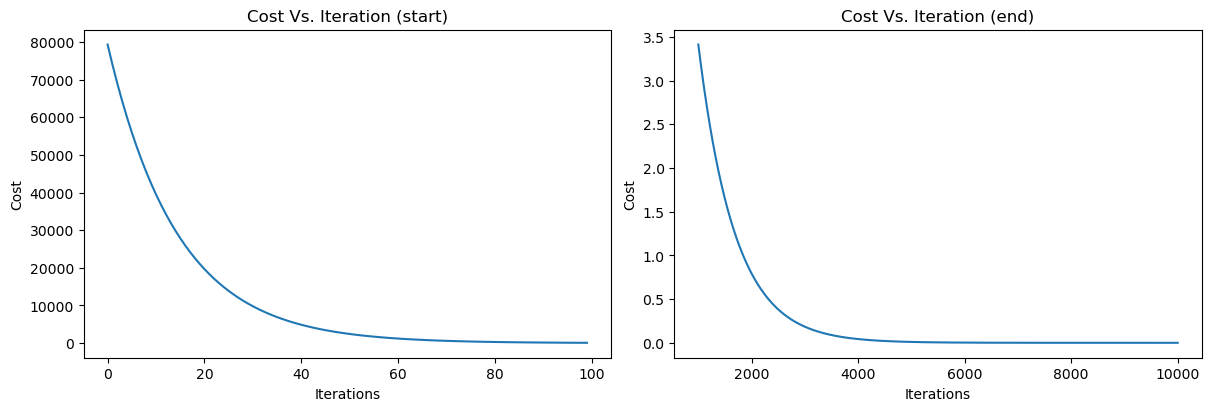

In [12]:
fig, ax = plt.subplots(ncols = 2, constrained_layout=True, figsize=(12,4))
ax[0].plot(cost[:100])
ax[1].plot(1000 + np.arange(len(cost[1000:])), cost[1000:])
ax[0].set_title("Cost Vs. Iteration (start)")
ax[1].set_title("Cost Vs. Iteration (end)")
ax[0].set_xlabel("Iterations")
ax[1].set_xlabel("Iterations")
ax[0].set_ylabel("Cost")
ax[1].set_ylabel("Cost")

In [13]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
